# Determining an Individuals Carbon Footprint

Using a synthetically generated dataset, this project seeks to determine which individual characteristics, such as diet, travel type and frequency affect our individual environmental impact, and uses regression analysis to determine how best to minimise ones' impact.

## Loading and Exploring the Data

Import the relevant libraries and create the dataframe:

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Carbon Emission.csv')
df = pd.DataFrame(dataset)

View a sample of the data to get an idea of columns and data types:

In [2]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


Renaming the columns in a more usable format:

In [3]:
df.rename(columns={
    'Body Type': 'bodyType', 'Sex': 'sex', 'Diet': 'diet', 'How Often Shower': 'shower', 'Heating Energy Source': 'heating',
    'Transport': 'transport', 'Vehicle Type': 'vehicle', 'Social Activity': 'social', 'Monthly Grocery Bill': 'monthlyGrocery',
    'Frequency of Traveling by Air': 'airTravel', 'Vehicle Monthly Distance Km': 'monthlyVehicle', 'Waste Bag Size': 'wasteSize',
    'Waste Bag Weekly Count': 'wasteCount', 'How Long TV PC Daily Hour': 'dailyScreen', 'How Many New Clothes Monthly': 'monthlyClothes',
    'How Long Internet Daily Hour': 'dailyInternet', 'Energy efficiency': 'energyEfficiency', 'Recycling': 'recycling',
    'Cooking_With': 'cookType', 'CarbonEmission': 'carbonEmission'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bodyType          10000 non-null  object
 1   sex               10000 non-null  object
 2   diet              10000 non-null  object
 3   shower            10000 non-null  object
 4   heating           10000 non-null  object
 5   transport         10000 non-null  object
 6   vehicle           3279 non-null   object
 7   social            10000 non-null  object
 8   monthlyGrocery    10000 non-null  int64 
 9   airTravel         10000 non-null  object
 10  monthlyVehicle    10000 non-null  int64 
 11  wasteSize         10000 non-null  object
 12  wasteCount        10000 non-null  int64 
 13  dailyScreen       10000 non-null  int64 
 14  monthlyClothes    10000 non-null  int64 
 15  dailyInternet     10000 non-null  int64 
 16  energyEfficiency  10000 non-null  object
 17  recycling    

In [5]:
df.replace(np.nan, 'None', inplace=True)

In [6]:
df.shape

(10000, 20)

In [7]:
df.dtypes

bodyType            object
sex                 object
diet                object
shower              object
heating             object
transport           object
vehicle             object
social              object
monthlyGrocery       int64
airTravel           object
monthlyVehicle       int64
wasteSize           object
wasteCount           int64
dailyScreen          int64
monthlyClothes       int64
dailyInternet        int64
energyEfficiency    object
recycling           object
cookType            object
carbonEmission       int64
dtype: object

Checking for outliers:

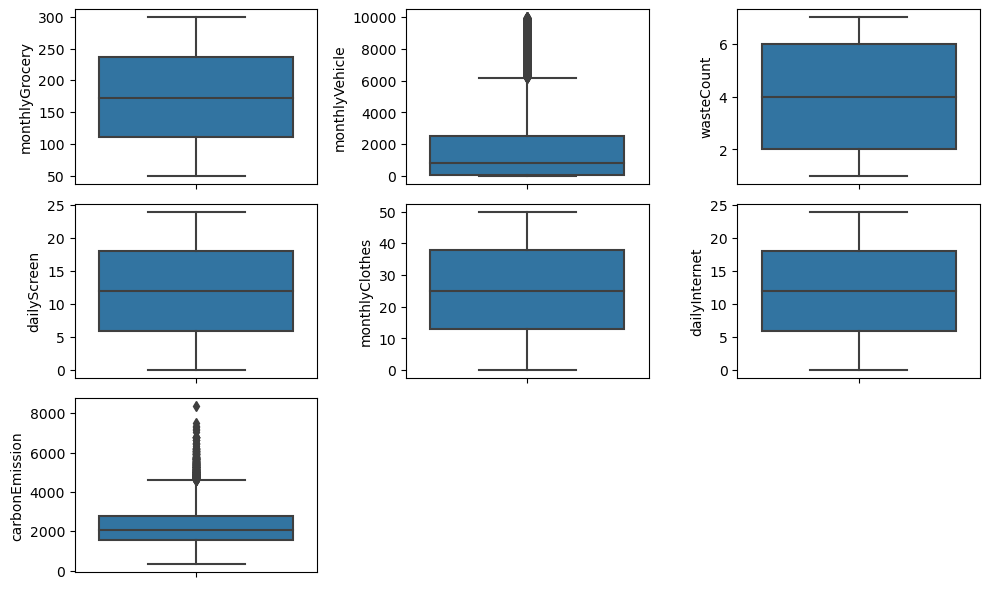

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = [column for column in df.columns if df[column].dtype != 'object']

plt.figure(figsize=(10, 6))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])

plt.tight_layout()
plt.show()

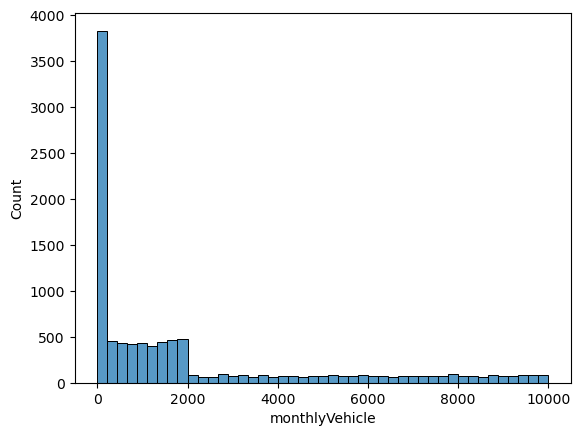

In [9]:
sns.histplot(df.monthlyVehicle)
plt.show()

In [10]:
df['monthlyVehicle'].value_counts(bins=10)

(-10.0, 999.9]      5336
(999.9, 1999.8]     2001
(8999.1, 9999.0]     360
(4999.5, 5999.4]     342
(6999.3, 7999.2]     341
(7999.2, 8999.1]     337
(1999.8, 2999.7]     333
(5999.4, 6999.3]     324
(2999.7, 3999.6]     322
(3999.6, 4999.5]     304
Name: monthlyVehicle, dtype: int64

## Aggregated Statistics

In [11]:
df.describe()

,monthlyGrocery,monthlyVehicle,wasteCount,dailyScreen,monthlyClothes,dailyInternet,carbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [12]:
df_diet = df.groupby(df.diet).mean()
df_diet

,monthlyGrocery,monthlyVehicle,wasteCount,dailyScreen,monthlyClothes,dailyInternet,carbonEmission
diet,,,,,,,
omnivore,173.908909,2163.101926,4.014848,12.144864,24.973515,11.847913,2391.980738
pescatarian,175.107674,1954.395850,3.990995,12.111198,25.034064,12.122161,2251.835552
vegan,171.736083,2049.983580,4.034842,12.284742,25.266720,11.981177,2215.761314
vegetarian,174.733822,1959.329670,4.059015,12.014652,25.164021,11.595035,2216.814408


In [13]:
df_sex = df.groupby('sex').mean()
df_sex

,monthlyGrocery,monthlyVehicle,wasteCount,dailyScreen,monthlyClothes,dailyInternet,carbonEmission
sex,,,,,,,
female,172.729978,2049.801478,4.027362,12.091672,25.084282,11.875774,2102.597164
male,175.023633,2013.118967,4.021831,12.186862,25.133787,11.902463,2436.164430


In [14]:
df_heat = df.groupby('heating').mean()
df_heat

,monthlyGrocery,monthlyVehicle,wasteCount,dailyScreen,monthlyClothes,dailyInternet,carbonEmission
heating,,,,,,,
coal,172.761395,2100.658740,3.994055,11.987713,25.171225,12.034879,2495.060246
electricity,172.877351,2023.771552,4.025862,12.181034,25.164185,11.734326,2039.379702
natural gas,175.041836,1950.305037,4.060926,12.233144,24.562957,11.872868,2248.124289
wood,174.883881,2049.768981,4.018270,12.157125,25.533902,11.916362,2296.815672


In [15]:
# Finding the person in the dataset with the lowest emissions
min_emission_index = df['carbonEmission'].idxmin()
min_emission = df.loc[min_emission_index]
min_emission

bodyType                            underweight
sex                                      female
diet                                 vegetarian
shower                              twice a day
heating                             electricity
transport                          walk/bicycle
vehicle                                    None
social                                sometimes
monthlyGrocery                              251
airTravel                                 never
monthlyVehicle                               11
wasteSize                                medium
wasteCount                                    1
dailyScreen                                   2
monthlyClothes                                3
dailyInternet                                14
energyEfficiency                            Yes
recycling           ['Paper', 'Glass', 'Metal']
cookType                      ['Stove', 'Oven']
carbonEmission                              306
Name: 2292, dtype: object

In [16]:
# Finding the person in the dataset with the highest emissions
max_emission_index = df['carbonEmission'].idxmax()
max_emission = df.loc[max_emission_index]
max_emission

bodyType                                     obese
sex                                           male
diet                                    vegetarian
shower                                       daily
heating                                       coal
transport                                  private
vehicle                                     petrol
social                                       often
monthlyGrocery                                 210
airTravel                          very frequently
monthlyVehicle                                9791
wasteSize                                    large
wasteCount                                       6
dailyScreen                                     16
monthlyClothes                                  22
dailyInternet                                    7
energyEfficiency                               Yes
recycling                       ['Paper', 'Glass']
cookType            ['Stove', 'Oven', 'Microwave']
carbonEmission                 

## Data Cleaning and Processing

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer, OrdinalEncoder
from sklearn.linear_model import LinearRegression

Ordinal encoding is used for variables which have a set order or ranking: for example, all other things equal, showering often will always create more emissions than showering never.

In [18]:
ordinal_encoder = OrdinalEncoder()
for col in df[['shower', 'airTravel', 'energyEfficiency']]:
    df[col] = ordinal_encoder.fit_transform(df[[col]])
    
df.head()

,bodyType,sex,diet,shower,heating,transport,vehicle,social,monthlyGrocery,airTravel,monthlyVehicle,wasteSize,wasteCount,dailyScreen,monthlyClothes,dailyInternet,energyEfficiency,recycling,cookType,carbonEmission
0,overweight,female,pescatarian,0.0,coal,public,None,often,230,0.0,210,large,4,7,26,1,0.0,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,1.0,natural gas,walk/bicycle,None,often,114,2.0,9,extra large,3,9,38,5,0.0,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,2.0,wood,private,petrol,never,138,1.0,2472,small,1,14,47,6,1.0,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,3.0,wood,walk/bicycle,None,sometimes,157,2.0,74,medium,3,20,5,7,1.0,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,0.0,coal,private,diesel,often,266,3.0,8457,large,1,3,5,6,2.0,['Paper'],['Oven'],4743


One hot encoding nominal categorical variables - these variables do not, or are assumed not to, have an inherent order regarding emission levels. It is assumed, for example, that being male does not imply a greater level of emissions than being female.

In [19]:
df = pd.get_dummies(df, columns=['bodyType', 'sex', 'diet', 'heating', 'transport', 'vehicle', 'social', 'wasteSize'], drop_first=True)
df.dtypes

shower                    float64
monthlyGrocery              int64
airTravel                 float64
monthlyVehicle              int64
wasteCount                  int64
dailyScreen                 int64
monthlyClothes              int64
dailyInternet               int64
energyEfficiency          float64
recycling                  object
cookType                   object
carbonEmission              int64
bodyType_obese              uint8
bodyType_overweight         uint8
bodyType_underweight        uint8
sex_male                    uint8
diet_pescatarian            uint8
diet_vegan                  uint8
diet_vegetarian             uint8
heating_electricity         uint8
heating_natural gas         uint8
heating_wood                uint8
transport_public            uint8
transport_walk/bicycle      uint8
vehicle_diesel              uint8
vehicle_electric            uint8
vehicle_hybrid              uint8
vehicle_lpg                 uint8
vehicle_petrol              uint8
social_often  

Apply the same method for the vehicle column, this time making sure to specify `dummy_na=False` in order to ignore null values. The resulting columns are then only interpreted as 'for those owning a vehicle, ...'.

In [20]:
# df = pd.get_dummies(df, columns=['vehicle'], dummy_na=True, drop_first=True)

After performing the one hot encoding, we are left with the following reference columns:
- Body Type: Normal
- Sex: Female
- Diet: Omnivore
- Transport: Private
- Social: Never
- Waste Size: Extra Large
- Vehicle: None

Next, applying a multi label binarizer to encode the recycling and cookType columns, both of which have list values.
<br>First, the `literal_eval` function from is applied from the `ast` module so that the values can be interpreted as lists.

In [21]:
import ast
df['recycling'] = df['recycling'].apply(ast.literal_eval)
df['cookType'] = df['cookType'].apply(ast.literal_eval)

In [22]:
mlb = MultiLabelBinarizer()
recycling_encoded = mlb.fit_transform(df['recycling'])
classes=mlb.classes_
recycling_df = pd.DataFrame(recycling_encoded, columns=classes)
recycling_df.head()

,Glass,Metal,Paper,Plastic
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,1,1,1
4,0,0,1,0


Now values are present in each column where a person recycles that material - unlike one hot encoding, this allows one observation to have values in multiple categories. For example at index 3, this person recycles glass, metal, paper and plastic. A multi label binarizer allows us to represent this where one hot encoding does not.

In [23]:
recycling_df.columns = ['recycling_' + col.lower() for col in recycling_df.columns]

Renaming the columns created by the binarizer, then performing the same operation on the other multi label column.

In [24]:
cooktype_encoded = mlb.fit_transform(df['cookType'])
classes=mlb.classes_
cooktype_df = pd.DataFrame(cooktype_encoded, columns=classes)
cooktype_df.columns = ['cookType_' + col.lower() for col in cooktype_df.columns]
cooktype_df.head()

,cookType_airfryer,cookType_grill,cookType_microwave,cookType_oven,cookType_stove
0,0,0,0,1,1
1,0,0,1,0,1
2,0,0,1,1,0
3,1,1,1,0,0
4,0,0,0,1,0


Next, the encoded columns above should be added back into the main dataframe, with the original columns removed.

In [25]:
df = df.join(recycling_df)
df = df.join(cooktype_df)
df.drop(columns=['recycling', 'cookType'], inplace=True)
df.head()

,shower,monthlyGrocery,airTravel,monthlyVehicle,wasteCount,dailyScreen,monthlyClothes,dailyInternet,energyEfficiency,carbonEmission,...,wasteSize_small,recycling_glass,recycling_metal,recycling_paper,recycling_plastic,cookType_airfryer,cookType_grill,cookType_microwave,cookType_oven,cookType_stove
0,0.0,230,0.0,210,4,7,26,1,0.0,2238,...,0,0,1,0,0,0,0,0,1,1
1,1.0,114,2.0,9,3,9,38,5,0.0,1892,...,0,0,1,0,0,0,0,1,0,1
2,2.0,138,1.0,2472,1,14,47,6,1.0,2595,...,1,0,1,0,0,0,0,1,1,0
3,3.0,157,2.0,74,3,20,5,7,1.0,1074,...,0,1,1,1,1,1,1,1,0,0
4,0.0,266,3.0,8457,1,3,5,6,2.0,4743,...,0,0,0,1,0,0,0,0,1,0


In [26]:
df.dtypes

shower                    float64
monthlyGrocery              int64
airTravel                 float64
monthlyVehicle              int64
wasteCount                  int64
dailyScreen                 int64
monthlyClothes              int64
dailyInternet               int64
energyEfficiency          float64
carbonEmission              int64
bodyType_obese              uint8
bodyType_overweight         uint8
bodyType_underweight        uint8
sex_male                    uint8
diet_pescatarian            uint8
diet_vegan                  uint8
diet_vegetarian             uint8
heating_electricity         uint8
heating_natural gas         uint8
heating_wood                uint8
transport_public            uint8
transport_walk/bicycle      uint8
vehicle_diesel              uint8
vehicle_electric            uint8
vehicle_hybrid              uint8
vehicle_lpg                 uint8
vehicle_petrol              uint8
social_often                uint8
social_sometimes            uint8
wasteSize_larg

## Linear Regression Model

Partition the data into training and testing sets, then fit the model on the training data.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('carbonEmission', axis=1)
y = df['carbonEmission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

Test the accuracy and explanatory power of the model by creating predicted values, then comparing these to the test set.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)
residuals = y_test - y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}\n Mean Squared Error: {mse}\n R Squared: {r2}')

Mean Absolute Error: 457.24241543579103
 Mean Squared Error: 261326.2536649729
 R Squared: 0.7486542659037646


## Testing Assumptions

1. Linearity: test by plotting observed values (the test set) vs predicted values (the values predicted by the model). A linear relationship is present, implying the linearity assumption is met.

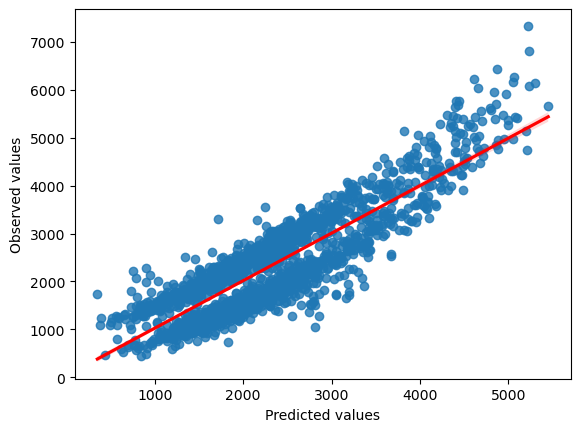

In [29]:
# testing linearity
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"})
plt.xlabel('Predicted values')
plt.ylabel('Observed values')
plt.show()

2. Independence - This can be assumed seeing as the data is collected randomly and samples are independent of one another. The data is not time series so autocorrelation is not present.

3. Homoskedasticity - test by plotting residuals vs predicted values. A random pattern is observed, implying the homoskedasticity assumption is met.

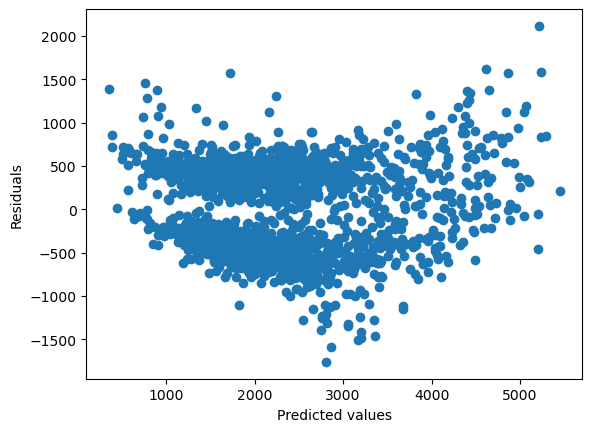

In [30]:
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

4. Normality - test by plotting a histogram of the residuals. The residuals indicate a bimodal distribution, violating the normality assumption.

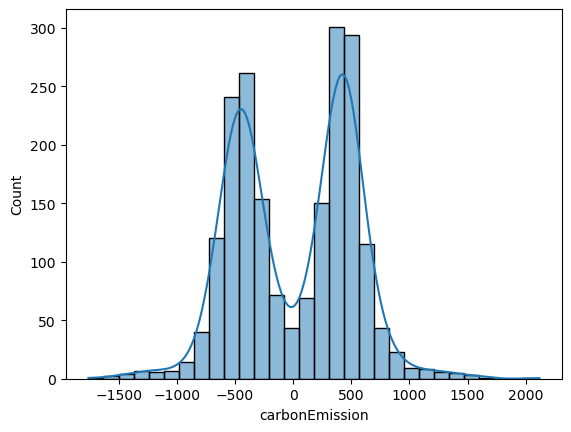

In [31]:
sns.histplot(residuals, bins=30, kde=True)
plt.show()


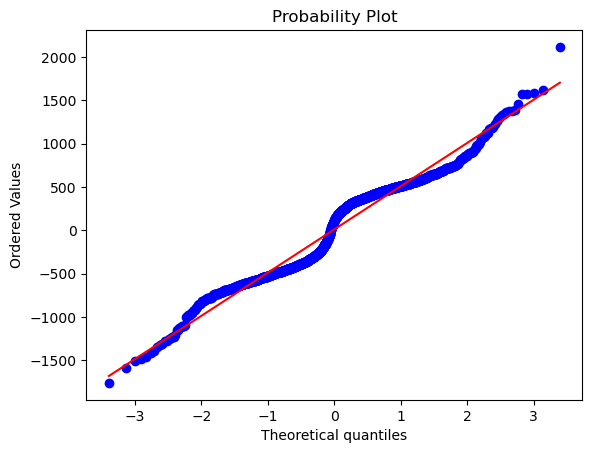

In [32]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

## Interpreting Model Statistics

Using the `statsmodels` module allows for a more conventionally presented summary of the model:

In [33]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         carbonEmission   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     609.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:50:23   Log-Likelihood:                -61294.
No. Observations:                8000   AIC:                         1.227e+05
Df Residuals:                    7961   BIC:                         1.229e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    818

`cookType_microwave` and `cookType_stove` are insignificant at the 5% level $(p>0.05)$. This implies that whether or not an individual cooks with either of these appliances does not make a significant difference to their overall emissions level.

## Conclusions Based on the Model

- An increase in showering frequency leads to a 12 unit increase in carbon emissions.
- A one dollar increase in monthly grocery costs leads to a 0.9 unit increase in carbon emissions.
- An increase in frequency of air travel leads to a 216 unit increase in carbon emissions.
- A one kilometer increase in distance travelled by vehicle in the past month leads to a 0.2 unit increase in carbon emissions.
- Having one more waste bag per week leads to an 85 unit increase in carbon emissions.
- A one hour increase in screen time per day leads to a 3 unit increase in carbon emissions.
- Buying one extra item of clothing per month leads to a 13.5 unit increase in carbon emissions.
- A one hour increase in time spent on the internet leads to a 6.5 unit increase in carbon emissions.
- An increase in energy efficiency leads to a 35 unit reduction in carbon emissions.
- Relative to those with a normal BMI, obese and overweight people are likely to create more carbon emissions (by 424 and 206 units respectively) while underweight people are likely to emit 116 units less.
- Being male leads to a 329 unit increase in carbon emissions relative to being female.
- Relative to omnivores, vegans, vegetarians and pescetarians create less carbon emissions (by 142, 124 and 80 units respectively), making a vegan lifestyle the most sustainable and an omnivorous one the least sustainable.
- Relative to coal heated households, electric, natural gas and wood heated households create less carbon emissions (by 426, 203 and 194 units respectively), making electricity the most sustainable heating source and coal the least sustainable.
- Relative to those who use private transport, those who use public transport or those who walk/cycle create less carbon emissions (by 188 and 65 units respectively), making public transport the most sustainable travel option and private transport the least sustainable.
- Relative to those who never socialise, those who socialise sometimes and often create more carbon emissions (by 78 and 165 units respectively).
- Relative to those with extra large waste bags, those who use large, medium and small waste bags create less carbon emissions (by 118, 271 and 382 units respectively).
- For those who use vehicles, those who drive disesl, LPG or petrol cars create more carbon emissions than those who do not use cars (by 392, 462 and 951 units respectively), while those who use hybrid or electric cars create less carbon emissions (by 97 and 910 units respectively), making electric cars the most sustainable vehicle option and petrol cars the least sustainable.
- Relative to those who do not recycle, those who recycle plastic, glass, metal and paper create less carbon emissions (by 66, 95, 119 and 137 units respectively), meaning each category of waste an individual recycles makes their lifestyle more sustainable.
- Relative to those who do not cook, those who use air fryers, grills and ovens create more emissions (by 18, 18 and 51 units respectively), while using a microwave or stove does not significantly impact the amount of emissions an individual creates. This implies using a microwave or stove are the most sustainable cooking options (besides not cooking at all), while using an oven is the least sustainable.

# Stratifying the model
One solution to deal with the significant right skew of the `monthlyVehicle` column, which may be the cause for the bimodal distribution of the residuals, is to create different regressions based on the values in the `transport` column, as these largely dictate the distance travelled by vehicle.

Mean Absolute Error: 518.2188809876957
 Mean Squared Error: 371715.2222459049
 R Squared: 0.7420335119977728


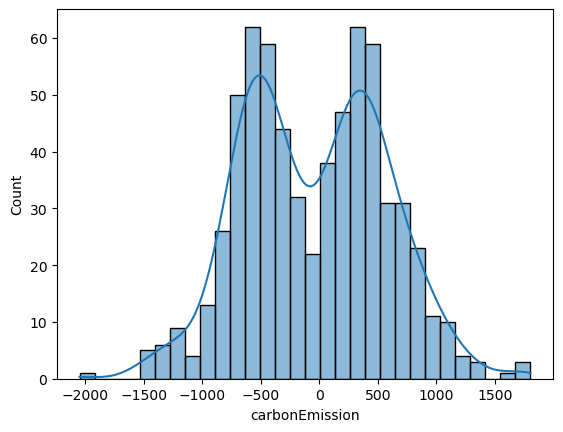

Mean Absolute Error: 445.76404482321556
 Mean Squared Error: 217417.08934718044
 R Squared: 0.5552421267796948


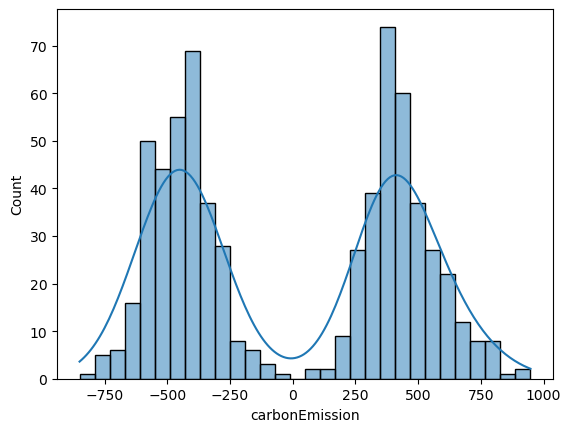

Mean Absolute Error: 442.11478417137357
 Mean Squared Error: 213002.7152897667
 R Squared: 0.5179965220834842


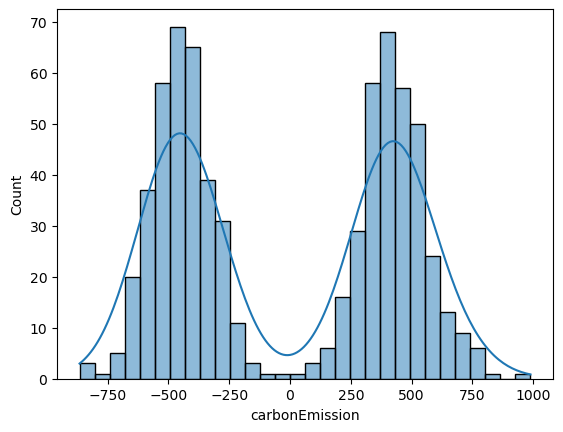

In [34]:
df_private = df[(df['transport_public'] == 0) & (df['transport_walk/bicycle'] == 0)]
df_public = df[df['transport_public'] == 1]
df_walk_bicycle = df[df['transport_walk/bicycle'] == 1]

def create_and_train_model(df):
    X = df.drop('carbonEmission', axis=1)
    y = df['carbonEmission']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    residuals = y_test - y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Absolute Error: {mae}\n Mean Squared Error: {mse}\n R Squared: {r2}')
    
    sns.histplot(residuals, bins=30, kde=True)
    plt.show()
    
    return lr, y_pred, residuals, mae, mse, r2

lr_private = create_and_train_model(df_private)
lr_public = create_and_train_model(df_public)
lr_walk_bicycle = create_and_train_model(df_walk_bicycle)

# Implementing a Random Forest Regressor
As the normality assumption is violated in this model, using a random forest regressor would be advantageous as this does not require residuals to be normally distributed.

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_score = r2_score(y_test, y_pred_rf)

rf_score

0.9181419001993766

In [36]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [10, 20, 30, 40]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
grid_search.best_estimator_

RandomForestRegressor(max_features=20, n_estimators=200)

In [38]:
grid_search.best_estimator_.score(X_test, y_test)

0.9213607501321094